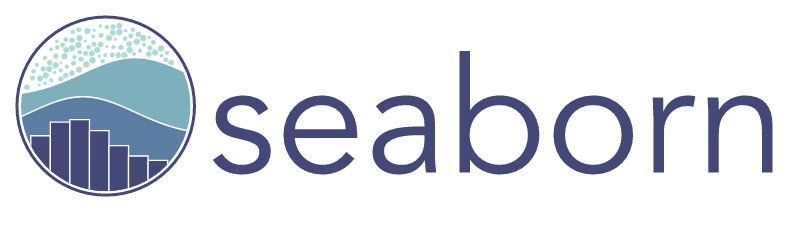

In [4]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns


In [7]:
# Начнем с чтения csv данных
df = pd.read_csv('california_housing_train.csv')

In [8]:
# Первые пять строк
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


# Изображаем статистические отношения
## **Scatterplot** (Точечный график)

Математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости. 

Библиотека **seaborn** без труда принимает **pandas** DataFrame(таблицу). Чтобы изобразить отношения между двумя столбцами достаточно указать, какой стобец отоброзить по оси **x**, а какой по оси **y**

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

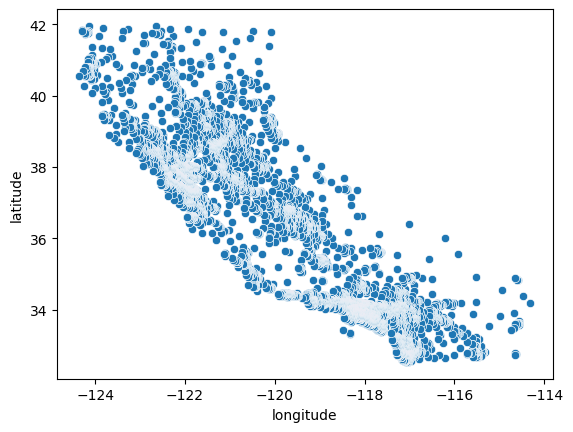

In [9]:
# Изображения точек долготы по отношению к широте.
# Можно заметить, что дома расположены в определенной "полосе" долготы и широты
sns.scatterplot(data=df, x="longitude", y="latitude")

<AxesSubplot: xlabel='households', ylabel='population'>

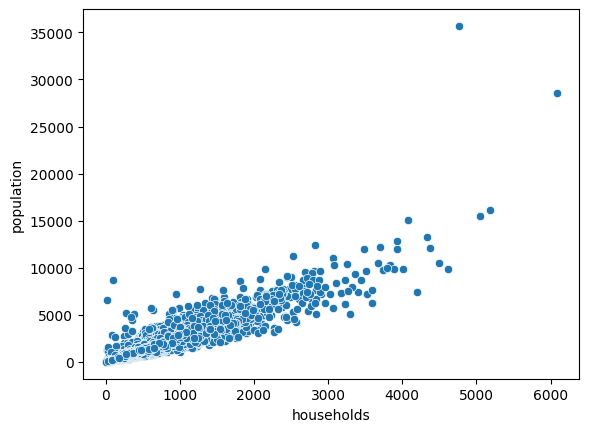

In [10]:
# Самостоятельная работа №1
# Изобразите отношение households к population
sns.scatterplot(data=df, x="households", y="population")

Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с помощью цвета. В данном случае опять же достаточно очевидное отношение, чем выше кол-во семей, тем выше кол-во людей и соответвтственно комнат

<AxesSubplot: xlabel='households', ylabel='population'>

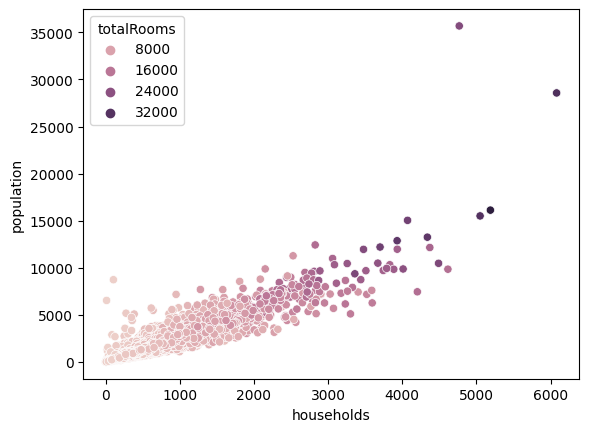

In [11]:
sns.scatterplot(data=df, x="households", y="population",  hue="totalRooms")

Помимо обозначения дополнительного измерения цветом мы можем использовать **size**

<AxesSubplot: xlabel='households', ylabel='population'>

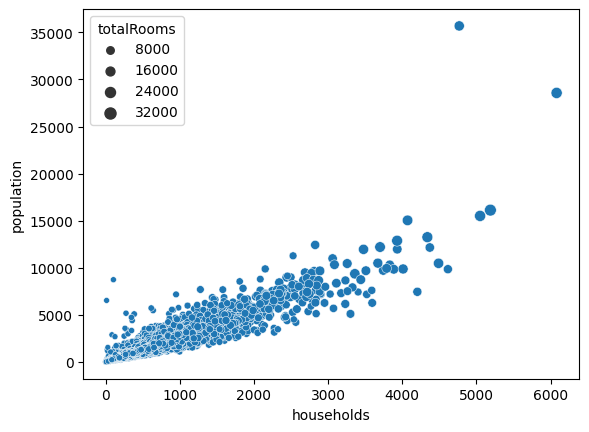

In [12]:
# Самостоятельная работа №2
# Добавьте totalRooms используя дополнительное измерение size
sns.scatterplot(data=df, x="households", y="population",  size="totalRooms")

Мы можем визуализировать сразу несколько отношений используя класс **PairGrid** внутри **seaborn**

**PairGrid** принимает как аргумент pandas **DataFrame** и визуализирует все возможные отношения между ними, в соответствии с выбранным типом графика.

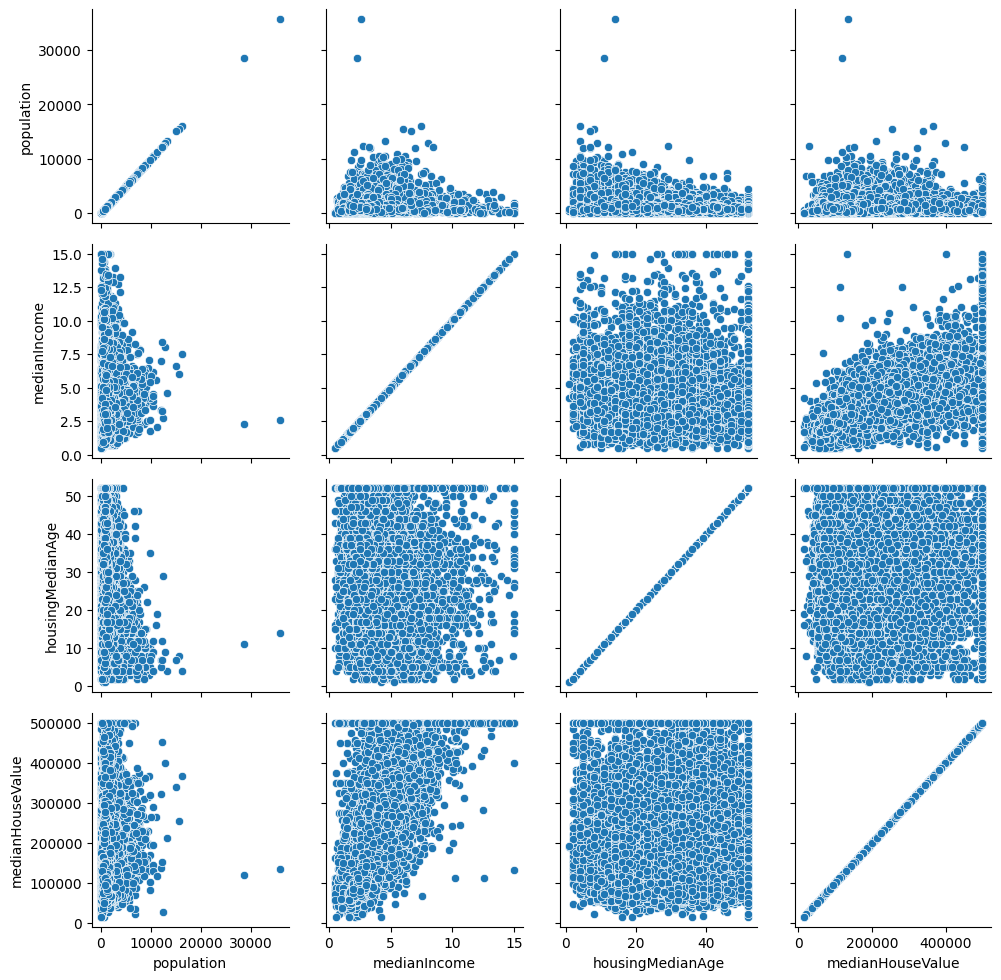

In [13]:
cols = ['population', 'medianIncome', 'housingMedianAge', 'medianHouseValue']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

Как вы думаете, чем вызвана линейная зависимость по диагонали?

## Линейные графики
Хорошо подойдут, если есть временная или кака-либо иная последовательность и значения, которые могум меняться в зависимости от неё.

Для генерации линейных графиков в **seaborn** используется **relplot** функция.
Она также принимает **DataFrame**, **x**, **y** - столбцы.

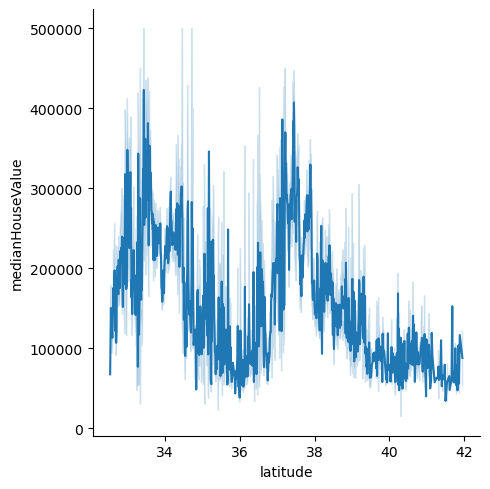

In [12]:
# Для визуализации выбирается тип line
sns.relplot(x="latitude", y="medianHouseValue", kind="line", data=df)

Можно видеть, что в определеных местах долготы цена за дома резко подскакивает

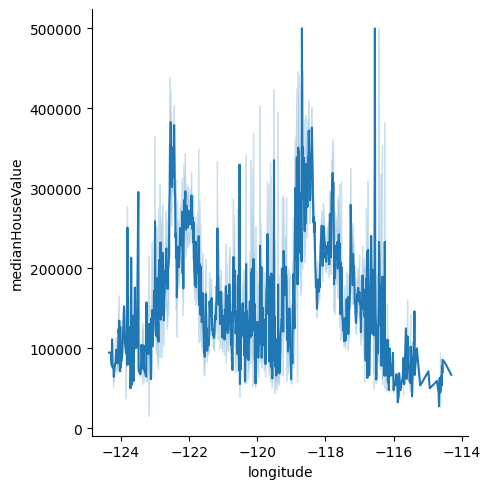

In [14]:
# Самостоятельная работа №3
# Визуализировать longitude по отношения к medianHouseValue
# Используя линейный график

sns.relplot(x="longitude", y="medianHouseValue", kind="line", data=df)





Можно видеть, что в определеных местах широты цена за дома также очень высока

Используя точечный график можно визуализировать эти отношения с большей четкостью. Скорее всего резкий рост цен связан с близостью к ценному объекту, повышающему качество жизни, скорее всего побережью океана или реки.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

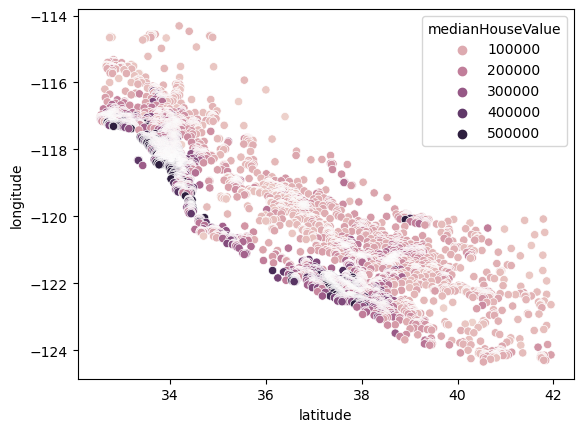

In [14]:
sns.scatterplot(data=df, x="latitude", y="longitude",  hue="medianHouseValue")

# Гистограмма
Способ представления табличных данных в графическом виде — в виде столбчатой диаграммы. По оси **x** обычно указывают значение, а по оси **y** - встречаемость(кол-во таких значений в выборке)

<AxesSubplot:xlabel='medianIncome', ylabel='Count'>

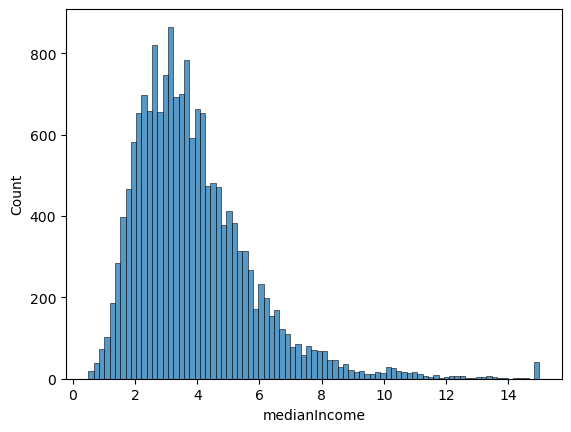

In [15]:
sns.histplot(data=df, x="medianIncome")

Можно видеть что у большинства семей доход находится между значениями 2 и 6.
И только очень небольшое ко-во людей обладают доходом > 10

<AxesSubplot: xlabel='housingMedianAge', ylabel='Count'>

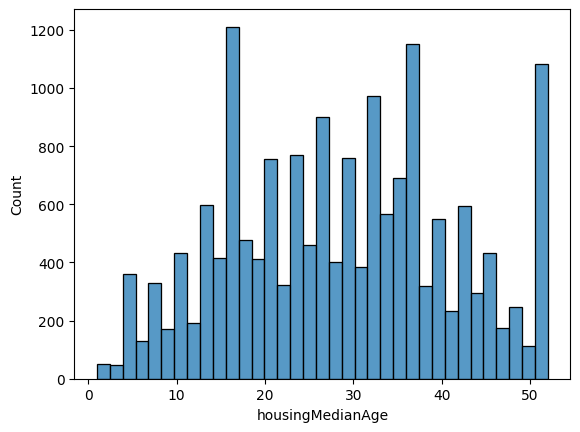

In [15]:
# Самостоятельная работа №5
# Изобраить гистограмму по housingMedianAge
sns.histplot(data=df, x="housingMedianAge")

Давайте посмотрим медианный доход у пожилых жителей

<AxesSubplot:xlabel='medianIncome', ylabel='Count'>

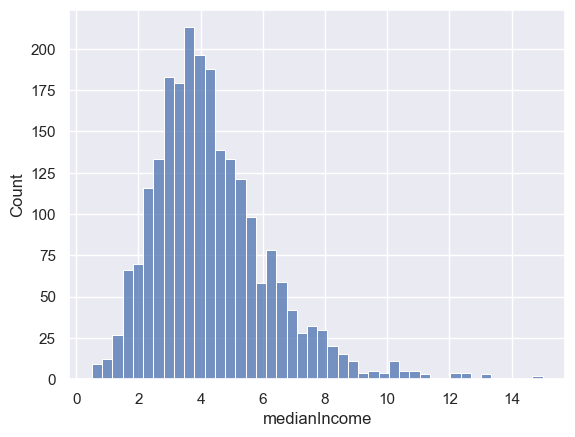

In [28]:
sns.set()
sns.histplot(data=df[df['housingMedianAge']<15], x="medianIncome")

Большого отличия от популяции в целом не наблюдается. Скорее всего это местные жители.

Давайте посмотрим на популяцию

<AxesSubplot:xlabel='population', ylabel='Count'>

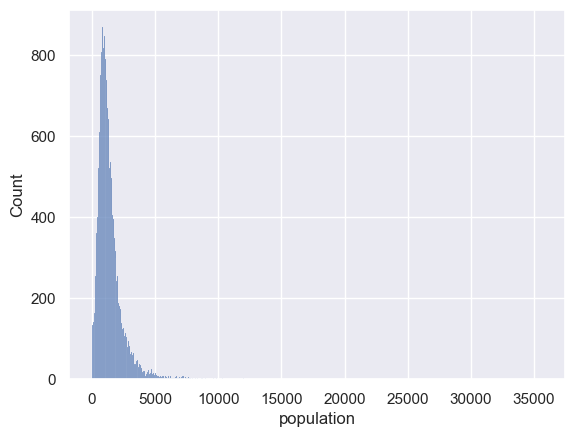

In [18]:
sns.set()
sns.histplot(data=df, x="population")

Разобьем возрастные группы на 3 категории те кто моложе 20 лет, от 20 до 50 и от 50, чтобы посмотреть влияет ли это на доход.

In [16]:
df.loc[df['housingMedianAge'] <= 20, 'ageGroup'] = 'Молодые'
df.loc[(df['housingMedianAge'] > 20) & (df['housingMedianAge'] <= 50), 'ageGroup'] = 'Ср. возраст'
df.loc[df['housingMedianAge'] > 50, 'ageGroup'] = 'Пожилые'

Применим group_by, чтобы получить среднее значение
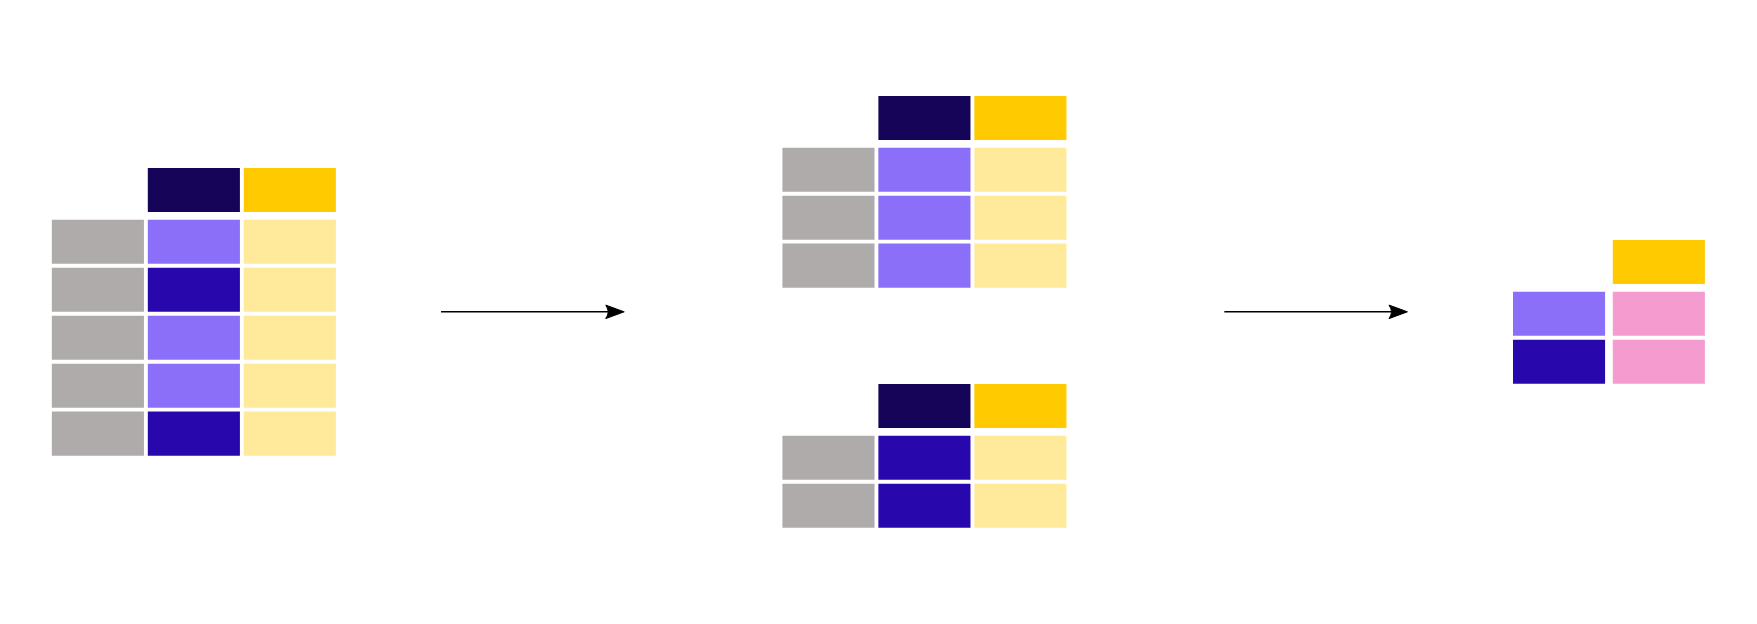

<AxesSubplot:xlabel='ageGroup'>

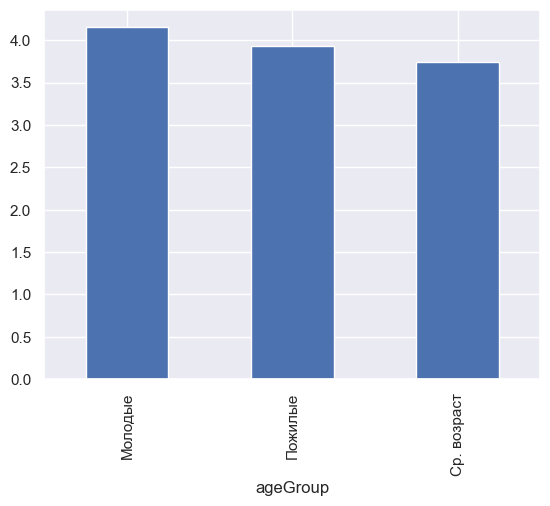

In [20]:
df.groupby('ageGroup')['medianIncome'].mean().plot(kind='bar')


Молодые оказываются самой богатой группой населения. Но отличие в доходе не значительное.

**Seaborn** так же позволяет нам смотреть распределение по многим параметрам.
Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6 и те у кого меньше. Изобразим дополнительное измерение с помощью оттенка в виде возрастных групп и групп по доходам.


In [20]:
df.loc[df['medianIncome'] > 6, 'incomeGroup'] = 'rich'
df.loc[df['medianIncome'] <= 6, 'incomeGroup'] = 'everyone_else'

In [17]:
# самомстоятельная
df.loc[df['medianIncome'] < 6, 'incomeGroup'] = 'normal'
df.loc[df['medianIncome'] >= 6, 'incomeGroup'] = 'rich'

<AxesSubplot: xlabel='medianHouseValue', ylabel='Count'>

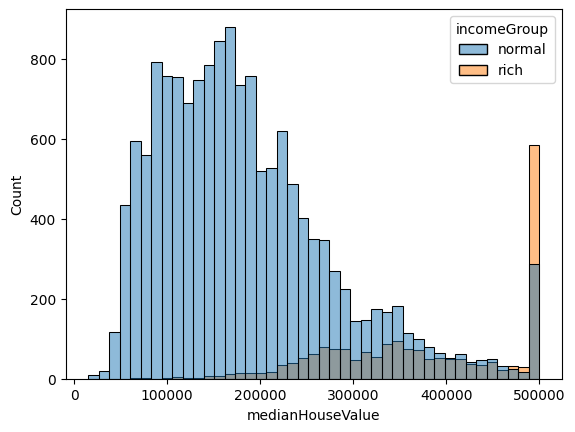

In [18]:
# самостоятельная
sns.histplot(data = df, x = 'medianHouseValue', hue='incomeGroup')

<AxesSubplot: xlabel='medianHouseValue', ylabel='Count'>

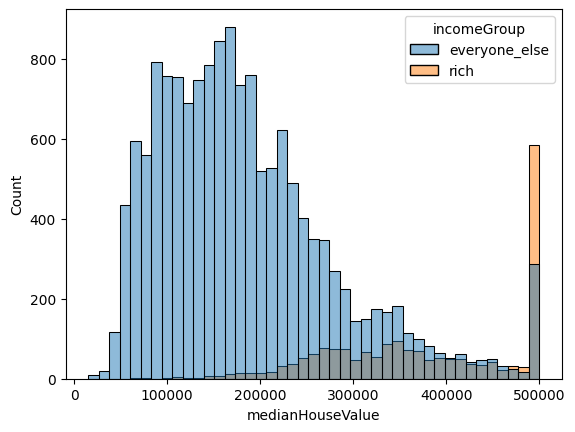

In [21]:
sns.histplot(df, x="medianHouseValue", hue="incomeGroup")

In [23]:
# Самостоятельная работа 
# Изобразить гистограмму по medianHouseValue с оттенком ageGroup

<AxesSubplot: xlabel='medianHouseValue', ylabel='Count'>

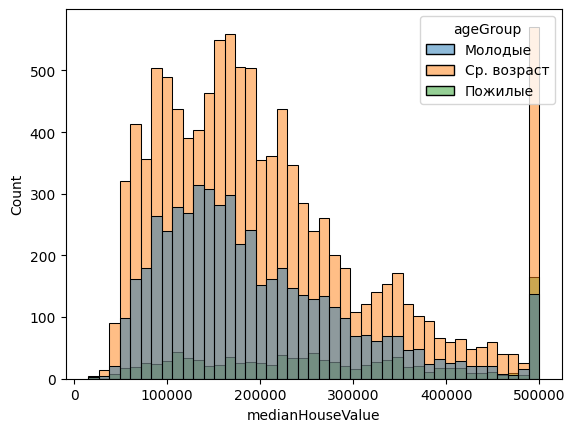

In [22]:
sns.histplot(data=df, x='medianHouseValue', hue='ageGroup')